In [3]:
function [X] = modmotor(t, prevX, u)
  L = 4.7857;
  J = 4.9285e-13;
  R = 2;
  B = 9.8544e-8;
  K = 0.01896;
  Va = u;
  h = 1e-7;
  omega = prevX(1);
  wp = prevX(2);
  theta = prevX(3);
  for ii = 1:t/h
    wpp =(-wp*(R*J+L*B)-omega*(R*B+K*K)+Va*K)/(J*L);
    wp = wp+h*wpp;
    omega = omega + h*wp;
    thetap = omega;
    theta = theta + h*thetap;
  end
  X = [omega,wp,theta];
end


Error en estado estacionario: 0.37796


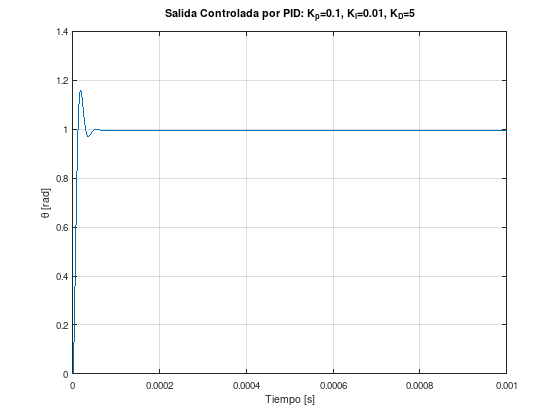

In [11]:
X = -[0; 0; 0];
index = 0;
h = 1e-7;
ref = 1;
simTime = 1e-3;
Kp = 0.1;
Ki = 0.01;
Kd = 5;
samplingPeriod = h;

%Variables PID discreto
A = ((2*Kp*samplingPeriod)+(Ki*(samplingPeriod^2))+(2*Kd))/(2*samplingPeriod);
B = (-2*Kp*samplingPeriod+Ki*(samplingPeriod^2)-4*Kd)/(2*samplingPeriod);
C = Kd/samplingPeriod;
e = zeros(simTime/h,1);
u = 0;

theta = zeros(simTime/h,1); % Agrega esta línea para inicializar theta
for t = 0:h:simTime
    index = index+1;
    k = index+2;
    X = motorModel(h,X,u);
    e(k) = ref-X(3);
    u = u+A*e(k)+B*e(k-1)+C*e(k-2);
    theta(index) = X(3); % Almacena el valor de theta en cada paso de tiempo
end
t = 0:h:simTime;

% Calcular el error en estado estacionario
error_ss = (ref - theta(end))*100;
disp(['Error en estado estacionario: ', num2str(error_ss)]);

plot(t,theta)
title('Salida Controlada por PID: K_p=0.1, K_i=0.01, K_D=5') % 
xlabel('Tiempo [s]') % 
ylabel('\theta [rad]') % 
grid



In [ ]:
## Vemos que hay un sobrepaso en la respuesta, para evitarla disminuiremos la accion derivativa.
# Nos lleva a aumentar el ess lo cual aumentariamos el valor de la accion integral



Error en estado estacionario: 0.93854


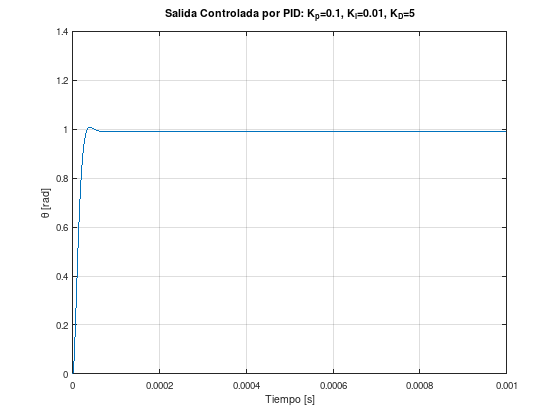

In [12]:
X = -[0; 0; 0];
index = 0;
h = 1e-7;
ref = 1;
simTime = 1e-3;
Kp = 1;
Ki = 1;
Kd = 2;
samplingPeriod = h;

%Variables PID discreto
A = ((2*Kp*samplingPeriod)+(Ki*(samplingPeriod^2))+(2*Kd))/(2*samplingPeriod);
B = (-2*Kp*samplingPeriod+Ki*(samplingPeriod^2)-4*Kd)/(2*samplingPeriod);
C = Kd/samplingPeriod;
e = zeros(simTime/h,1);
u = 0;

theta = zeros(simTime/h,1); % Agrega esta línea para inicializar theta
for t = 0:h:simTime
    index = index+1;
    k = index+2;
    X = motorModel(h,X,u);
    e(k) = ref-X(3);
    u = u+A*e(k)+B*e(k-1)+C*e(k-2);
    theta(index) = X(3); % Almacena el valor de theta en cada paso de tiempo
end
t = 0:h:simTime;

% Calcular el error en estado estacionario
error_ss = (ref - theta(end))*100;
disp(['Error en estado estacionario: ', num2str(error_ss)]);

plot(t,theta)
title('Salida Controlada por PID: K_p=0.1, K_i=0.01, K_D=5') % 
xlabel('Tiempo [s]') % 
ylabel('\theta [rad]') % 
grid